In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)

In [3]:
df = airline_data[["FlightDate", "Reporting_Airline", "Origin", "ArrDelay", "DepDelay" ]]


<Axes: >

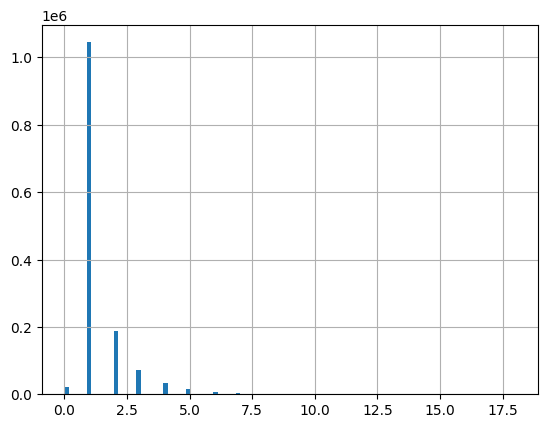

In [4]:
df.groupby(["FlightDate", "Reporting_Airline", "Origin"]).count()["DepDelay"].hist(bins=100)

In [5]:
df.groupby(["FlightDate", "Reporting_Airline", "Origin"]).count().sort_values("DepDelay", ascending=False)

ArrDelay  DepDelay
FlightDate Reporting_Airline Origin                    
2000-02-20 DL                ATL           18        18
2019-07-26 DL                ATL           17        17
2019-10-04 DL                ATL           17        17
2015-08-17 DL                ATL           16        16
2016-08-15 DL                ATL           16        16
...                                       ...       ...
2004-03-16 MQ                BOS            0         0
           US                EWR            0         0
                             MHT            0         0
                             RIC            0         0
2020-03-31 YX                PHL            0         0

[1390766 rows x 2 columns]

In [6]:
test = df.groupby(["FlightDate", "Reporting_Airline", "Origin"]).count().sort_values("DepDelay", ascending=False)["DepDelay"] > 1

In [7]:
test.sum()/test.shape[0]

0.23404799944778631

In [8]:
over_airline_airport_pairs = df.groupby(["FlightDate", "Reporting_Airline", "Origin"]).apply(lambda x:
    x["ArrDelay"].sum() - x["DepDelay"].sum()
)

In [12]:
df.columns

Index(['FlightDate', 'Reporting_Airline', 'Origin', 'ArrDelay', 'DepDelay',
       'Arr - Dep'],
      dtype='object')

In [13]:
df["Arr - Dep"] = df["ArrDelay"] - df["DepDelay"]
df.groupby("Reporting_Airline")[['ArrDelay', 'DepDelay','Arr - Dep']].mean()

C:\Users\seanh\AppData\Local\Temp\ipykernel_28564\2125624803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Arr - Dep"] = df["ArrDelay"] - df["DepDelay"]


,ArrDelay,DepDelay,Arr - Dep
Reporting_Airline,,,
9E,3.755849,7.753923,-3.908536
AA,6.187563,8.442962,-2.166723
AS,4.703452,5.854416,-1.030629
B6,8.966919,12.999784,-3.943043
CO,6.726528,7.727288,-0.939513
DH,7.136173,9.763825,-2.605487
DL,5.221679,7.559099,-2.279897
EA,6.917353,8.392810,-1.194105
EV,9.315619,12.664960,-3.260764


In [14]:
delay_df = df[df["ArrDelay"] > 0]
delay_df["Arr - Dep"] = delay_df["ArrDelay"] - delay_df["DepDelay"]
delay_df.groupby("Reporting_Airline")[['ArrDelay', 'DepDelay','Arr - Dep']].mean()

C:\Users\seanh\AppData\Local\Temp\ipykernel_28564\3194973426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df["Arr - Dep"] = delay_df["ArrDelay"] - delay_df["DepDelay"]


,ArrDelay,DepDelay,Arr - Dep
Reporting_Airline,,,
9E,36.638126,30.858298,5.829989
AA,28.199329,21.520790,6.678539
AS,22.684598,17.001875,5.682723
B6,41.462545,36.663334,4.799211
CO,25.233385,17.587955,7.645430
DH,35.051767,29.813638,5.238129
DL,23.145068,17.551471,5.593597
EA,21.916097,16.185591,5.730506
EV,40.155891,36.481265,3.674626


In [15]:
# https://gist.github.com/AndreiCalazans/390e82a1c3edff852137cb3da813eceb

airline_code_dictory = {
  "U2": "easyjet",
  "1T": "Bulgarian Air Charter",
  "Q5": "40-Mile Air",
  "4O": "Interjet",
  "7A": "Express Air Cargo",
  "JY": "Air Turks and Caicos",
  "JU": "Air Serbia",
  "QH": "Kyrgyzstan",
  "A8": "Benin Golf Air",
  "RV": "Caspian Airlines",
  "1B": "Abacus International",
  "W9": "Eastwind Airlines",
  "6U": "Air Ukraine",
  "E4": "Aero Asia International",
  "ZI": "Aigle Azur",
  "AE": "Mandarin Airlines",
  "OZ": "Ozark Air Lines",
  "8U": "Afriqiyah Airways",
  "Q9": "Afrinat International Airlines",
  "KI": "Adam Air",
  "QB": "Georgian National Airlines",
  "LD": "Air Hong Kong",
  "UX": "Air Europa",
  "NX": "Air Macau",
  "ZV": "Air Midwest",
  "HM": "Air Seychelles",
  "AF": "Air France",
  "SB": "Air Caledonie International",
  "EH": "SAETA",
  "ZW": "Air Wisconsin",
  "GN": "Air Gabon",
  "NQ": "Air Japan",
  "VD": "SwedJet Airways",
  "TT": "Tigerair Australia",
  "4N": "Air North Charter - Canada",
  "NZ": "Eagle Airways",
  "QM": "Air Malawi",
  "ML": "Midway Airlines (1976–1991)",
  "P8": "Pantanal Linhas Aéreas",
  "BM": "BMI Regional",
  "ZX": "Air Georgian",
  "G8": "Gujarat Airways",
  "7T": "Tobruk Air",
  "6V": "Mars RK",
  "NH": "All Nippon Airways",
  "TZ": "ATA Airlines",
  "2Q": "Air Cargo Carriers",
  "V7": "Volotea",
  "AB": "Air Berlin",
  "4D": "Air Sinai",
  "QN": "Air Armenia",
  "AI": "Air India Limited",
  "PJ": "Air Saint Pierre",
  "SZ": "Air Southwest",
  "8C": "Shanxi Airlines",
  "NF": "Air Vanuatu",
  "ZB": "Monarch Airlines",
  "CC": "Macair Airlines",
  "RB": "Syrian Arab Airlines",
  "TN": "Air Tahiti Nui",
  "SW": "Air Namibia",
  "AW": "Dirgantara Air Service",
  "PE": "People's Viennaline",
  "JM": "Jetstar Hong Kong Airways",
  "6G": "Air Wales",
  "TX": "Transportes Aéreos Nacionales",
  "IX": "Air India Express",
  "BT": "Air Baltic",
  "EL": "Ellinair",
  "YW": "Air Nostrum",
  "PX": "Air Niugini",
  "G9": "Air Arabia",
  "AC": "Air Canada",
  "AP": "Air One",
  "XT": "SkyStar Airways",
  "UM": "Air Zimbabwe",
  "S2": "Air Sahara",
  "TC": "Air Tanzania",
  "2J": "Air Burkina",
  "KM": "Air Malta",
  "YT": "Air Togo",
  "G4": "Allegiant Air",
  "M3": "North Flying",
  "O4": "Antrak Air",
  "GB": "ABX Air",
  "8V": "Wright Air Service",
  "8T": "Air Tindi",
  "JP": "Adria Airways",
  "A3": "Aegean Airlines",
  "2K": "Aerogal",
  "KD": "KD Avia",
  "KO": "Alaska Central Express",
  "VX": "Virgin America",
  "KH": "Aloha Air Cargo",
  "AA": "American Airlines",
  "AX": "Trans States Airlines",
  "AN": "Ansett Australia",
  "5W": "Astraeus",
  "VV": "Aerosvit Airlines",
  "WK": "Edelweiss Air",
  "QQ": "Reno Air",
  "FG": "Ariana Afghan Airlines",
  "Y2": "Flyglobespan",
  "SU": "Aeroflot Russian Airlines",
  "5Z": "VivaColombia",
  "5D": "DonbassAero",
  "1A": "Amadeus IT Group",
  "JJ": "LATAM Brasil",
  "PL": "Airstars",
  "8A": "Atlas Blue",
  "GD": "Air Alpha Greenland",
  "HT": "Aeromist-Kharkiv",
  "J2": "Azerbaijan Airlines",
  "U3": "Avies",
  "4Y": "Yute Air Alaska",
  "5A": "Alpine Air Express",
  "W4": "Aero Services Executive",
  "IZ": "Arkia Israel Airlines",
  "M6": "Amerijet International",
  "4A": "Air Kiribati",
  "EV": "ExpressJet",
  "HP": "Phoenix Airways",
  "VH": "Aeropostal Alas de Venezuela",
  "AM": "Aeroméxico",
  "TL": "Trans Mediterranean Airlines",
  "OY": "Omni Air International",
  "IW": "Wings Air",
  "J6": "AVCOM",
  "2D": "Aero VIP",
  "VB": "VIVA Aerobus",
  "OE": "Asia Overnight Express",
  "GV": "Aero Flight",
  "JW": "Vanilla Air",
  "2B": "Aerocondor",
  "4C": "Aires, Aerovías de Integración Regional, S.A.",
  "AR": "Aerolíneas Argentinas",
  "AS": "Alaska Airlines, Inc.",
  "OB": "Oasis International Airlines",
  "HC": "Iceland Express",
  "FO": "Airlines of Tasmania",
  "OS": "Austrian Airlines",
  "IQ": "Augsburg Airways",
  "RU": "SkyKing Turks and Caicos Airways",
  "MO": "Calm Air",
  "GR": "Gemini Air Cargo",
  "NO": "Neos",
  "AU": "Austral Líneas Aéreas",
  "AO": "Australian Airlines",
  "AV": "Avianca - Aerovías del Continente Americano S.A.",
  "A0": "Avianca Argentina",
  "O6": "Avianca Brazil",
  "K8": "Airlink Zambia",
  "B9": "Air Bangladesh",
  "HJ": "Hellas Jet",
  "AK": "Air Bridge Carriers",
  "D7": "FlyAsianXpress",
  "DJ": "Polynesian Blue",
  "I5": "AirAsia India",
  "EX": "Air Santo Domingo",
  "3G": "Atlant-Soyuz Airlines",
  "AZ": "Alitalia",
  "ZE": "Líneas Aéreas Azteca",
  "A2": "Cielos Airlines",
  "R7": "Aserca Airlines",
  "RX": "Aviaexpress",
  "MQ": "American Eagle Airlines",
  "ZS": "Sama Airlines",
  "FF": "Airshop",
  "VU": "Air Ivoire",
  "BP": "Air Botswana",
  "GS": "Tianjin Airlines",
  "VT": "Air Tahiti",
  "3N": "Air Urga",
  "VL": "Air VIA",
  "FK": "Keewatin Air",
  "G2": "Avirex",
  "V8": "Iliamna Air Taxi",
  "K6": "Khalifa Airways",
  "VE": "C.A.I. Second",
  "V5": "Royal Aruban Airlines",
  "CA": "Air China",
  "Q6": "Aero Condor Peru",
  "5F": "Fly One",
  "QC": "Air Corridor",
  "NV": "Air Central",
  "CV": "Cargolux",
  "CW": "Air Marshall Islands",
  "ZA": "Interavia Airlines",
  "AH": "Air Algérie",
  "ER": "Astar Air Cargo",
  "HO": "Juneyao Airlines",
  "EN": "Air Dolomiti",
  "NM": "Mount Cook Airlines",
  "EE": "Aero Airlines",
  "4F": "Air City",
  "EI": "Aer Lingus",
  "E8": "Alpi Eagles",
  "KY": "Air São Tomé and Príncipe",
  "PC": "Pegasus Airlines",
  "OF": "Transports et Travaux Aériens de Madagascar",
  "FJ": "Fiji Airways",
  "RC": "Atlantic Airways",
  "NY": "Air Iceland",
  "2P": "Air Philippines",
  "2U": "Air Guinee Express",
  "0A": "Amber Air",
  "DA": "Air Georgia",
  "GL": "Miami Air International",
  "LL": "Allegro",
  "5Y": "Atlas Air",
  "GG": "Cargo 360",
  "H9": "Izair",
  "HD": "AIRDO",
  "IP": "Atyrau Air Ways",
  "QK": "Air Canada Jazz",
  "KK": "Atlasjet",
  "JS": "Air Koryo",
  "KC": "Air Astana",
  "LV": "Albanian Airlines",
  "3S": "Air Guyane Express",
  "D4": "Alidaunia",
  "9I": "Thai Sky Airlines",
  "XL": "Aerolane",
  "A6": "Hongtu Airlines",
  "TD": "Tulip Air",
  "L8": "Air Luxor GB",
  "LK": "Air Luxor",
  "MK": "Air Mauritius",
  "MD": "Air Madagascar",
  "9U": "Air Moldova",
  "L9": "Teamline Air",
  "A7": "Air Plus Comet",
  "QO": "Origin Pacific Airways",
  "MR": "Air Mauritanie",
  "F4": "Albarka Air",
  "AJ": "Aero Contractors",
  "8Y": "China Postal Airlines",
  "OT": "Aeropelican Air Services",
  "AD": "Azul Linhas Aéreas Brasileiras",
  "QD": "Air Class Líneas Aéreas",
  "QS": "Travel Service",
  "AG": "",
  "MC": "Air Mobility Command",
  "RE": "Stobart Air",
  "UU": "Air Austral",
  "ZP": "Silk Way Airlines",
  "6K": "Asian Spirit",
  "A5": "Hop!",
  "QL": "Línea Aérea de Servicio Ejecutivo Regional",
  "R3": "Yakutia Airlines",
  "MV": "Armenian International Airways",
  "2O": "Air Salone",
  "U8": "Armavia",
  "BQ": "Baltia Air Lines",
  "P5": "AeroRepública",
  "BF": "Bluebird Cargo",
  "5L": "AeroSur",
  "JR": "Aero California",
  "Z3": "Avient Aviation",
  "GM": "Air Slovakia",
  "VW": "Aeromar",
  "OR": "TUI Airlines Netherlands",
  "CG": "Airlines PNG",
  "TY": "Iberworld",
  "FL": "AirTran Airways",
  "TS": "Air Transat",
  "EC": "Avialeasing Aviation Company",
  "DW": "Aero-Charter Ukraine",
  "U7": "USA Jet Airlines",
  "6R": "Alrosa Air Company",
  "6A": "Aviacsa",
  "JZ": "Skyways Express",
  "AQ": "MAP-Management and Planung",
  "3J": "Zip",
  "SM": "Swedline Express",
  "KJ": "British Mediterranean Airways",
  "BX": "Coast Air",
  "YE": "Aryan Cargo Express",
  "VJ": "Vietjet Air",
  "3O": "Air Arabia Maroc",
  "X9": "Avion Express",
  "JD": "Beijing Capital Airlines",
  "ID": "Interlink Airlines",
  "BA": "British Airways",
  "BG": "Biman Bangladesh Airlines",
  "B4": "Bankair",
  "WX": "CityJet",
  "BZ": "Keystone Air Service",
  "JA": "JetSMART",
  "J4": "Jordan International Air Cargo",
  "8H": "BH Air",
  "4T": "Belair Airlines",
  "UP": "Bahamasair",
  "E6": "Bringer Air Cargo Taxi Aéreo",
  "LZ": "Balkan Bulgarian Airlines",
  "TH": "Transmile Air Services",
  "BS": "British International Helicopters",
  "PG": "Bangkok Airways",
  "KF": "Blue1",
  "JV": "Bearskin Lake Air Service",
  "B3": "Bellview Airlines",
  "BD": "BMI",
  "WW": "WOW air",
  "CH": "Bemidji Airlines",
  "BO": "Bouraq Indonesia Airlines",
  "BV": "Blue Panorama Airlines",
  "7R": "BRA-Transportes Aéreos",
  "8E": "Bering Air",
  "B2": "Belavia Belarusian Airlines",
  "BN": "Horizon Airlines",
  "GQ": "Big Sky Airlines",
  "V9": "Star1 Airlines",
  "Y6": "Batavia Air",
  "BU": "Buryat Airlines Aircompany",
  "J8": "Berjaya Air",
  "QW": "Blue Wings",
  "SN": "Brussels Airlines",
  "DB": "Brit Air",
  "E9": "Boston-Maine Airways",
  "NT": "Binter Canarias",
  "0B": "Blue Air",
  "FB": "Bulgaria Air",
  "8N": "Barents AirLink",
  "CJ": "CityFlyer Express",
  "YB": "Borajet",
  "BW": "Caribbean Airlines",
  "7N": "PAWA Dominicana",
  "5C": "CAL Cargo Air Lines",
  "3C": "RegionsAir",
  "R9": "Camai Air",
  "UY": "Cameroon Airlines",
  "C6": "CanJet",
  "CP": "Compass Airlines",
  "5T": "Canadian North",
  "W2": "Canadian Western Airlines",
  "9K": "Cape Air",
  "PT": "West Air Sweden",
  "2G": "Cargoitalia",
  "W8": "Cargojet Airways",
  "C8": "Chicago Express Airlines",
  "8B": "Caribbean Star Airlines",
  "V3": "Carpatair",
  "CX": "Cathay Pacific",
  "KX": "Cayman Airways",
  "5J": "Cebu Pacific",
  "3B": "Central Connect Airlines",
  "9M": "Central Mountain Air",
  "J7": "ValuJet Airlines",
  "WE": "Thai Smile Airways",
  "OP": "Chalk's International Airlines",
  "MG": "Champion Air",
  "2Z": "Chang An Airlines",
  "S8": "Skywise Airline",
  "CI": "China Airlines",
  "CK": "China Cargo Airlines",
  "MU": "China Eastern Airlines",
  "G5": "China Express Airlines",
  "WH": "WebJet Linhas Aéreas",
  "CZ": "China Southern Airlines",
  "KN": "China United Airlines",
  "XO": "LTE International Airways",
  "3Q": "China Yunnan Airlines",
  "X7": "Chitaavia",
  "QI": "Cimber Sterling",
  "C7": "Rico Linhas Aéreas",
  "C9": "Cirrus Airlines",
  "CF": "City Airline",
  "G3": "Gol Transportes Aéreos",
  "CT": "Civil Air Transport",
  "6P": "Club Air",
  "DQ": "Coastal Air",
  "9L": "Colgan Air",
  "YD": "Cologne Air Transport GmbH",
  "OH": "PSA Airlines",
  "MN": "Comair",
  "C5": "CommutAir",
  "KR": "Comores Airlines",
  "GJ": "Eurofly",
  "DE": "Condor Flugdienst",
  "CO": "Continental Express",
  "CS": "Continental Micronesia",
  "V0": "Conviasa",
  "CM": "Copa Airlines",
  "CQ": "Sunshine Express Airlines",
  "XC": "Corendon Airlines",
  "CD": "Corendon Dutch Airlines",
  "SS": "Corsairfly",
  "XK": "Corse Méditerranée",
  "F5": "Cosmic Air",
  "OU": "Croatia Airlines",
  "7C": "Jeju Air",
  "QE": "Crossair Europe",
  "CU": "Cubana de Aviación",
  "CY": "Cyprus Airways",
  "YK": "Cyprus Turkish Airlines",
  "OK": "Czech Airlines",
  "8L": "Redhill Aviation",
  "XG": "Clickair",
  "WD": "WDL Aviation",
  "DX": "DAT Danish Air Transport",
  "ES": "DHL International",
  "L3": "LTU Austria",
  "D3": "Daallo Airlines",
  "N2": "Kabo Air",
  "H8": "Dalavia",
  "0D": "Darwin Airline",
  "D5": "Dauair",
  "DL": "Delta Air Lines",
  "2A": "Deutsche Bahn",
  "1I": "Sky Trek International Airlines",
  "DH": "Independence Air",
  "Z6": "Dniproavia",
  "YU": "Dominair",
  "DO": "Dominicana de Aviación",
  "E3": "Domodedovo Airlines",
  "D9": "Donavia",
  "KA": "Dragonair, Hong Kong Dragon Airlines",
  "KB": "Druk Air",
  "DI": "Dba",
  "9A": "Eagle Express Air Charter",
  "E1": "Everbread",
  "1C": "Electronic Data Systems",
  "1Y": "Electronic Data Systems",
  "BR": "EVA Air",
  "EY": "Etihad Airways",
  "H7": "Eagle Air",
  "QU": "Uganda Airlines",
  "S9": "East African Safari Air",
  "EA": "European Air Express",
  "T3": "Eastern Airways",
  "QF": "Sunstate Airlines",
  "DK": "Eastland Air",
  "MS": "Egyptair",
  "LY": "El Al Israel Airlines",
  "UZ": "El-Buraq Air Transport",
  "EK": "Emirates Airlines",
  "EM": "Empire Airlines",
  "EU": "Empresa Ecuatoriana De Aviación",
  "E0": "Eos Airlines",
  "B8": "Eritrean Airlines",
  "E7": "European Aviation Air Charter",
  "OV": "SalamAir",
  "ET": "Ethiopian Airlines",
  "RZ": "Euro Exec Express",
  "MM": "SAM Colombia",
  "UI": "Eurocypria Airlines",
  "K2": "Eurolot",
  "3W": "Euromanx Airways",
  "5O": "Europe Airpost",
  "QY": "European Air Transport",
  "EW": "Eurowings",
  "EZ": "Sun Air of Scandinavia",
  "JN": "Excel Airways",
  "MB": "MNG Airlines",
  "OW": "Executive Airlines",
  "EO": "Hewa Bora Airways",
  "U2": "United Feeder Service",
  "DS": "easyJet Switzerland",
  "IH": "Irtysh Air",
  "EF": "Far Eastern Air Transport",
  "FD": "Thai AirAsia",
  "F6": "FaroeJet",
  "F3": "Faso Airways",
  "FX": "Federal Express",
  "N8": "National Air Cargo dba National Airlines",
  "4S": "Finalair Congo",
  "AY": "Finnair",
  "FC": "Finncomm Airlines",
  "FY": "Northwest Regional Airlines",
  "7F": "First Air",
  "DP": "First Choice Airways",
  "8F": "Fischer Air",
  "8D": "Servant Air",
  "B5": "Flightline",
  "PA": "Pan American World Airways",
  "RF": "Florida West International Airways",
  "F2": "Fly Air",
  "OJ": "Overland Airways",
  "SH": "Fly Me Sweden",
  "TE": "Skytaxi",
  "LF": "FlyNordic",
  "F7": "Flybaboo",
  "BE": "Flybe",
  "W3": "Switfair Cargo",
  "VY": "Vueling Airlines",
  "HK": "Four Star Aviation / Four Star Cargo",
  "FH": "Futura International Airways",
  "SJ": "Freedom Air",
  "FP": "Servicios Aéreos de los Andes",
  "F9": "Frontier Airlines",
  "2F": "Frontier Flying Service",
  "FZ": "Flydubai",
  "9Y": "Fly Georgia",
  "VK": "Virgin Nigeria Airways",
  "GX": "Pacificair",
  "Y5": "Pace Airlines",
  "GT": "GB Airways",
  "Z5": "GMG Airlines",
  "7O": "Galaxy Air",
  "1G": "Galileo International",
  "GC": "Gambia International Airlines",
  "G7": "GoJet Airlines",
  "GA": "Garuda Indonesia",
  "4G": "Gazpromavia",
  "A9": "Georgian Airways",
  "ST": "Germania",
  "4U": "Germanwings",
  "GP": "Palau Trans Pacific Airlines",
  "GH": "Ghana Airways",
  "G0": "Ghana International Airlines",
  "GK": "JetStar Japan",
  "DC": "Golden Air",
  "G1": "Gorkha Airlines",
  "ZK": "Great Lakes Airlines",
  "IJ": "Spring Airlines Japan",
  "G6": "Air Volga",
  "J9": "Jazeera Airways",
  "GF": "Gulf Air Bahrain",
  "GY": "Tri-MG Intra Asia Airlines",
  "H6": "Hageland Aviation Services",
  "HR": "Hahn Air",
  "HU": "Hainan Airlines",
  "1R": "Hainan Phoenix Information Systems",
  "2T": "Haiti Ambassador Airlines",
  "4R": "Hamburg International",
  "X3": "Hapag-Lloyd Express (TUIfly)",
  "HF": "Hapagfly",
  "HB": "Harbor Airlines",
  "HQ": "Thomas Cook Airlines",
  "HA": "Hawaiian Airlines",
  "BH": "Hawkair",
  "HN": "Heavylift Cargo Airlines",
  "JB": "Helijet",
  "ZU": "Helios Airways",
  "HW": "North-Wright Airways",
  "2L": "Helvetic Airways",
  "UD": "Hex'Air",
  "5K": "Hi Fly",
  "H5": "Mavial Magadan Airlines",
  "HX": "Hong Kong Airlines",
  "RH": "Republic Express Airlines",
  "UO": "Hong Kong Express Airways",
  "HH": "Hope Air",
  "QX": "Horizon Air",
  "H4": "Inter Island Airways",
  "IK": "Lankair",
  "II": "IBC Airways",
  "0C": "IBL Aviation",
  "C3": "Independent Carrier (ICAR)",
  "1F": "INFINI Travel Information",
  "1U": "Polyot Sirena",
  "IB": "Iberia Airlines",
  "I2": "Iberia Express",
  "FW": "Ibex Airlines",
  "FI": "Icelandair",
  "6E": "IndiGo Airlines",
  "IC": "Indian Airlines",
  "I9": "Indigo Airlines",
  "QZ": "Indonesia AirAsia",
  "IO": "Indonesian Airlines",
  "D6": "Interair South Africa",
  "RS": "Sky Regional Airlines",
  "6I": "International Business Air",
  "3L": "Intersky",
  "I4": "Interstate Airlines",
  "IR": "Iran Air",
  "EP": "Iran Aseman Airlines",
  "IA": "Iraqi Airways",
  "2S": "Satgur Air Transport",
  "CN": "Westward Airways",
  "IF": "Islas Airways",
  "WC": "Islena De Inversiones",
  "6H": "Israir",
  "FS": "Servicios de Transportes Aéreos Fueguinos",
  "GI": "Itek Air",
  "XM": "J-Air",
  "JC": "JAL Express",
  "JO": "Jettime",
  "MT": "Thomas Cook Airlines",
  "1M": "JSC Transport Automated Information Systems",
  "JI": "Midway Airlines (1993–2003)",
  "3X": "Japan Air Commuter",
  "JL": "Japan Airlines Domestic",
  "EG": "Japan Asia Airways",
  "NU": "Japan Transocean Air",
  "O2": "Linear Air",
  "9W": "Jet Airways",
  "QJ": "Jet Airways",
  "PP": "Jet Aviation",
  "3K": "Jetstar Asia Airways",
  "LS": "Jet2.com",
  "B6": "JetBlue Airways",
  "JF": "L.A.B. Flying Service",
  "0J": "Jetclub",
  "SG": "Spicejet",
  "JQ": "Jetstar Airways",
  "JX": "Jett8 Airlines Cargo",
  "R5": "Malta Air Charter",
  "6J": "Skynet Asia Airways",
  "KW": "Wataniya Airways",
  "WA": "Western Airlines",
  "KL": "KLM",
  "K4": "Kalitta Air",
  "K9": "Krylo Airlines",
  "RQ": "Kam Air",
  "E2": "Rio Grande Air",
  "V2": "Vision Airlines",
  "KV": "Kavminvodyavia",
  "M5": "Kenmore Air",
  "KQ": "Kenya Airways",
  "IT": "Tigerair Taiwan",
  "Y9": "Kish Air",
  "KP": "Kiwi International Air Lines",
  "7K": "Kogalymavia Air Company",
  "8J": "Komiinteravia",
  "KE": "Korean Air",
  "7B": "Krasnojarsky Airlines",
  "GW": "SkyGreece Airlines",
  "KU": "Kuwait Airways",
  "GO": "Kuzu Airlines Cargo",
  "N5": "Skagway Air Service",
  "R8": "Kyrgyzstan Airlines",
  "YQ": "TAR Aerolineas",
  "LR": "LACSA",
  "KG": "LAI - Línea Aérea IAACA",
  "LA": "LATAM Chile",
  "4M": "LATAM Argentina",
  "PZ": "TAM Mercosur",
  "LU": "LATAM Express",
  "LP": "LATAM Peru",
  "NI": "Portugalia",
  "L5": "Lufttransport",
  "LO": "LOT Polish Airlines",
  "LT": "LongJiang Airlines",
  "N6": "Nuevo Continente",
  "QV": "Lao Airlines",
  "L7": "Línea Aérea SAPSA",
  "NG": "Lauda Air",
  "LQ": "Lebanese Air Transport",
  "LI": "Leeward Islands Air Transport",
  "LN": "Libyan Arab Airlines",
  "TM": "Linhas Aéreas de Moçambique",
  "JT": "Lion Mentari Airlines",
  "LM": "Livingston",
  "LB": "Lloyd Aéreo Boliviano",
  "LC": "Varig Logística",
  "HE": "Luftfahrtgesellschaft Walter",
  "LH": "Lufthansa Cargo",
  "CL": "Lufthansa CityLine",
  "L1": "Lufthansa Systems",
  "DV": "Nantucket Airlines",
  "LG": "Luxair",
  "5V": "Lviv Airlines",
  "L2": "Lynden Air Cargo",
  "L4": "Lynx Aviation",
  "Z8": "Línea Aérea Amaszonas",
  "MJ": "Mihin Lanka",
  "Q2": "Maldivian (airline)",
  "OD": "Malindo Airways",
  "M7": "Tropical Airways",
  "MH": "Malaysia Airlines",
  "IN": "NAM Air",
  "OM": "MIAT Mongolian Airlines",
  "DM": "Maersk",
  "W5": "Mahan Air",
  "M2": "MHS Aviation GmbH",
  "TF": "Malmö Aviation",
  "MA": "Malév Hungarian Airlines",
  "RI": "Mandala Airlines",
  "JE": "Mango",
  "MP": "Martinair",
  "Q4": "Starlink Aviation",
  "8M": "Myanmar Airways International",
  "MY": "Midwest Airlines (Egypt)",
  "MW": "Mokulele Airlines",
  "7M": "Mayair",
  "M8": "Mekong Airlines",
  "IM": "Menajet",
  "IG": "Meridiana",
  "MZ": "Merpati Nusantara Airlines",
  "YV": "Mesa Airlines",
  "XJ": "Thai AirAsia X",
  "MX": "Mexicana de Aviación",
  "ME": "Middle East Airlines",
  "YX": "Midwest Airlines",
  "M4": "Mistral Air",
  "2M": "Moldavian Airlines",
  "8I": "Myway Airlines",
  "YM": "Montenegro Airlines",
  "5M": "Sibaviatrans",
  "3R": "Moskovia Airlines",
  "M9": "Motor Sich",
  "N4": "Nordwind Airlines",
  "VZ": "Thai Vietjet Air",
  "UB": "Myanma Airways",
  "6N": "Nordic Regional",
  "P9": "Peruvian Airlines",
  "UE": "Transeuropean Airlines",
  "N7": "National Airlines",
  "NA": "North American Airlines",
  "9O": "National Airways Cameroon",
  "NC": "Northern Air Cargo",
  "CE": "Nationwide Airlines",
  "1N": "Navitaire",
  "RA": "Nepal Airlines",
  "EJ": "New England Airlines",
  "2N": "Yuzhmashavia",
  "HG": "Niki",
  "KZ": "Nippon Cargo Airlines",
  "DD": "Nok Air",
  "5N": "Nordavia",
  "JH": "Nordeste Linhas Aéreas Regionais",
  "N9": "North Coast Aviation",
  "NW": "Northwest Airlines",
  "J3": "Northwestern Air",
  "DY": "Norwegian Air Shuttle",
  "D8": "Norwegian Air International",
  "DU": "Norwegian Long Haul",
  "BJ": "Nouvel Air Tunisie",
  "O9": "Nova Airline",
  "VQ": "Novo Air",
  "NK": "Spirit Airlines",
  "UQ": "O'Connor Airlines",
  "O8": "Oasis Hong Kong Airlines",
  "VC": "Voyageur Airways",
  "OA": "Olympic Airlines",
  "WY": "Oman Air",
  "8Q": "Princess Air",
  "R2": "Orenburg Airlines",
  "OX": "Orient Thai Airlines",
  "OL": "OLT Express Germany",
  "ON": "Our Airline",
  "O7": "Ozjet Airlines",
  "PV": "St Barth Commuter",
  "9Q": "PB Air",
  "PU": "PLUNA",
  "U4": "PMTair",
  "BL": "Pacific Airlines",
  "8P": "Pacific Coastal Airlines",
  "Q8": "Pacific East Asia Cargo Airlines",
  "LW": "Sun Air International",
  "PK": "Pakistan International Airlines",
  "PF": "Palestinian Airlines",
  "NR": "Pamir Airways",
  "PN": "Pan American Airways",
  "I7": "Paramount Airways",
  "P3": "Passaredo Transportes Aéreos",
  "KS": "Peninsula Airways",
  "Z2": "EZD",
  "PR": "Philippine Airlines",
  "9R": "Phuket Air",
  "PI": "Sun Air (Fiji)",
  "9E": "Pinnacle Airlines",
  "PO": "Polar Air Cargo",
  "PH": "Polynesian Airlines",
  "PD": "Porter Airlines",
  "BK": "Potomac Air",
  "PW": "Precision Air",
  "TO": "Transavia France",
  "FE": "Primaris Airlines",
  "8W": "Private Wings Flugcharter",
  "P6": "Privilege Style Líneas Aéreas",
  "P0": "Proflight Zambia",
  "FV": "Rossiya",
  "QR": "Qatar Airways",
  "R6": "RACSA",
  "1D": "Radixx Solutions International",
  "V4": "Vieques Air Link",
  "FN": "Regional Air Lines",
  "ZL": "Regional Express",
  "P7": "Russian Sky Airlines",
  "RW": "Republic Airlines",
  "RL": "Royal Phnom Penh Airways",
  "SL": "Thai Lion Mentari",
  "GZ": "Air Rarotonga",
  "RR": "Royal Air Force",
  "AT": "Royal Air Maroc",
  "R0": "Royal Airlines",
  "BI": "Royal Brunei Airlines",
  "RJ": "Royal Jordanian",
  "RK": "Royal Khmer Airlines",
  "WR": "WestJet Encore",
  "WB": "Rwandair Express",
  "7S": "Ryan Air Service",
  "RD": "Ryan International Airlines",
  "FR": "Ryanair",
  "YS": "Régional Compagnie Aérienne Européenne",
  "TR": "Tigerair Singapore",
  "6Y": "Smartlynx Airlines",
  "7E": "Sylt Air GmbH",
  "S4": "SATA International",
  "SA": "South African Airways",
  "W7": "Western Pacific Airlines",
  "NL": "Shaheen Air International",
  "SK": "SAS Braathens",
  "UG": "Tuninter",
  "S7": "S7 Airlines",
  "BB": "Seaborne Airlines",
  "K5": "SeaPort Airlines",
  "UL": "SriLankan Airlines",
  "SY": "Sun Country Airlines",
  "I6": "Sky Eyes",
  "7G": "Star Flyer",
  "FA": "Safair",
  "HZ": "Sat Airlines",
  "SP": "SATA Air Acores",
  "8S": "Scorpio Aviation",
  "ZY": "Sky Airlines",
  "SQ": "Singapore Airlines Cargo",
  "SI": "Skynet Airlines",
  "XS": "SITA",
  "FT": "Siem Reap Airways",
  "SX": "Skybus Airlines",
  "S6": "Star Air",
  "D2": "Severstal Air Company",
  "5G": "Skyservice Airlines",
  "SD": "Sudan Airways",
  "SV": "Saudia",
  "WN": "Southwest Airlines",
  "A4": "Southern Winds Airlines",
  "WG": "Sunwing Airlines",
  "LX": "Swiss International Air Lines",
  "SR": "Swissair",
  "WV": "Swe Fly",
  "XQ": "SunExpress",
  "AL": "TransAVIAexport Airlines",
  "E5": "Samara Airlines",
  "SC": "Shandong Airlines",
  "9C": "Spring Airlines",
  "3U": "Sichuan Airlines",
  "FM": "Shanghai Airlines",
  "ZH": "Shenzhen Airlines",
  "7L": "Sun D'Or",
  "NE": "SkyEurope",
  "SO": "Sunshine Airlines",
  "JK": "Spanair",
  "1Z": "Sabre Pacific",
  "1S": "Sabre",
  "1H": "Siren-Travel",
  "1Q": "Sirena",
  "1K": "Sutra",
  "2C": "SNCF",
  "S0": "Slok Air Gambia",
  "S3": "Santa Barbara Airlines",
  "H2": "Sky Airline",
  "OO": "SkyWest Airlines",
  "BC": "Skymark Airlines",
  "LJ": "Sierra National Airlines",
  "MI": "SilkAir",
  "6Q": "Slovak Airlines",
  "PY": "Surinam Airways",
  "NB": "Sterling Airlines",
  "IE": "Solomon Airlines",
  "6W": "Saratov Airlines Joint Stock Company",
  "S5": "Trast Aero",
  "R1": "Sirin",
  "O3": "SF Airlines",
  "EQ": "TAME",
  "TP": "TAP Portugal",
  "TU": "Tunisair",
  "3V": "TNT Airways",
  "T2": "Thai Air Cargo",
  "TQ": "Tandem Aero",
  "ZT": "Titan Airways",
  "DG": "Tigerair Philippines",
  "TG": "Thai Airways International",
  "TK": "Turkish Airlines",
  "T7": "Twin Jet",
  "3P": "Tiara Air",
  "TI": "Tol-Air Services",
  "BY": "Thomson Airways",
  "PM": "Tropic Air",
  "QT": "TAMPA",
  "K3": "Taquan Air Services",
  "GE": "TransAsia Airways",
  "HV": "Transavia Holland",
  "VR": "TACV",
  "T9": "Thai Star Airlines",
  "9T": "Transwest Air",
  "UN": "Transaero Airlines",
  "T5": "Turkmenhovayollary",
  "T6": "Tavrey Airlines",
  "TW": "T'way Air",
  "6B": "TUIfly Nordic",
  "DT": "TAAG Angola Airlines",
  "SF": "Tassili Airlines",
  "TJ": "Tradewind Aviation",
  "1E": "Travelsky Technology",
  "2H": "Thalys",
  "1L": "Open Skies Consultative Commission",
  "RO": "Tarom",
  "3T": "Turan Air",
  "T4": "TRIP Linhas Aéreas",
  "L6": "Tbilaviamsheni",
  "XN": "XpressAir",
  "VO": "Tyrolean Airways",
  "U5": "USA3000 Airlines",
  "UA": "United Airlines",
  "4H": "United Airways",
  "U6": "Ural Airlines",
  "UF": "UM Airlines",
  "6Z": "Ukrainian Cargo Airways",
  "5X": "United Parcel Service",
  "US": "US Airways",
  "UH": "US Helicopter",
  "UT": "UTair Aviation",
  "HY": "Uzbekistan Airways",
  "PS": "Ukraine International Airlines",
  "VA": "Viasa",
  "VF": "Valuair",
  "0V": "Vietnam Air Services Company (VASCO)",
  "VN": "Vietnam Airlines",
  "NN": "VIM Airlines",
  "2R": "Via Rail Canada",
  "Y4": "Volaris",
  "VI": "Volga-Dnepr Airlines",
  "TV": "Virgin Express",
  "VS": "Virgin Atlantic Airways",
  "ZG": "Viva Macau",
  "XF": "Vladivostok Air",
  "VM": "Viaggio Air",
  "9V": "Vipair Airlines",
  "RG": "VRG Linhas Aéreas",
  "VP": "VASP",
  "VG": "VLM Airlines",
  "WT": "Wasaya Airways",
  "2W": "Welcome Air",
  "WZ": "West African Airlines",
  "YH": "West Caribbean Airways",
  "8O": "West Coast Air",
  "WS": "WestJet",
  "XP": "Xtra Airways",
  "WF": "Widerøe",
  "IV": "Wind Jet",
  "7W": "Windrose Air",
  "8Z": "Wizz Air Bulgaria",
  "W6": "Wizz Air",
  "WO": "World Airways",
  "1P": "Worldspan",
  "MF": "Xiamen Airlines",
  "SE": "XL Airways France",
  "YL": "Yamal Airlines",
  "Y8": "Yangtze River Express",
  "Y0": "Yellow Air Taxi/Friendship Airways",
  "IY": "Yemenia",
  "C4": "Zimex Aviation",
  "Q3": "Zambian Airways",
  "Z4": "Zoom Airlines"
}

In [16]:
airline_data["Reporting_Airline_Name"] = airline_data["Reporting_Airline"].replace(airline_code_dictory)
def network_study(df):
    Airports = df["Origin"].value_counts() + df["Dest"].value_counts()
    Airports = Airports.reset_index().T

    Airports.columns = Airports.loc["index"]
    return Airports.drop("index")




airport_dist = airline_data.groupby("Reporting_Airline_Name").apply(network_study).reset_index().set_index("Reporting_Airline_Name").drop("level_1", axis=1)


In [17]:
max_node_cap = airport_dist.max(axis=1)
max_node_prop =  max_node_cap / airport_dist.sum(axis=1)
#max_node_prop = max_node_prop.sort_values(ascending=False)
airline_data["Prop of Airlines Traffic at Biggest Hub"] = airline_data["Reporting_Airline_Name"].apply(lambda x: (max_node_prop).loc[x])
airline_data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Reporting_Airline_Name,Prop of Airlines Traffic at Biggest Hub
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,0.213371
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AirTran Airways,0.323014
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines,0.177004
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,0.246880
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US Airways,0.153192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2008,1,3,23,7,2008-03-23,WN,19393,WN,N712SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,0.062549
1999996,1999,1,1,5,2,1999-01-05,CO,19704,CO,N14308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continental Express,0.230368
1999997,2003,4,11,14,5,2003-11-14,US,20355,US,N528AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US Airways,0.153192
1999998,2012,2,5,15,2,2012-05-15,WN,19393,WN,N281WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,0.062549


In [18]:
df = airline_data[["FlightDate", "Reporting_Airline_Name", "Origin", "ArrDelay", "DepDelay", "Prop of Airlines Traffic at Biggest Hub" ]]

delay_df = df[df["ArrDelay"] > 0]
delay_df["Arr - Dep"] = delay_df["ArrDelay"] - delay_df["DepDelay"]
delay_df.groupby("Reporting_Airline_Name").mean()

C:\Users\seanh\AppData\Local\Temp\ipykernel_28564\2805255642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df["Arr - Dep"] = delay_df["ArrDelay"] - delay_df["DepDelay"]


TypeError: Could not convert 2003-12-132005-04-072004-08-092004-07-282005-07-132004-10-282004-09-032003-12-072003-04-302003-09-302006-05-032004-01-132004-10-302006-07-132005-02-162004-07-162005-12-272006-12-222004-01-122003-05-182003-07-102003-02-072005-12-222005-02-022003-04-282003-05-022005-12-302003-10-272003-03-202006-09-152005-10-222004-03-182004-08-122003-08-152005-10-192005-12-112005-10-162003-04-212003-11-182003-04-212003-08-222004-07-172003-12-012003-08-052003-07-072003-10-072004-04-082005-01-142004-06-182003-04-182005-07-182006-06-042006-07-072005-04-292003-05-062005-09-192004-09-012003-04-232004-01-062005-06-282005-02-172004-01-062004-08-032003-06-232004-04-022005-06-262004-02-272004-01-132004-05-182004-04-032004-08-242003-11-022003-08-032003-11-232005-01-032004-07-252004-11-042003-01-172004-11-282004-12-062005-01-012003-01-302006-04-192004-02-202003-11-232006-01-032004-07-122005-02-232005-06-152004-01-092006-12-092003-12-012005-02-052003-12-242004-02-192004-07-192003-04-072004-05-252005-12-052004-11-202004-04-212006-01-242004-05-222005-01-282005-02-252006-11-182003-02-232003-04-162003-11-162004-02-132003-07-272006-06-192003-04-052004-09-272004-12-312005-06-112006-03-312004-12-182004-05-032005-10-212005-01-302004-10-042005-08-262004-07-142005-06-162003-04-032004-04-162006-12-302003-02-272003-05-262006-07-302004-02-022003-11-052003-12-192004-08-012006-04-052004-04-142004-11-012003-09-012004-12-312003-03-292005-12-282003-10-242004-06-172005-10-142004-01-152004-04-122005-07-202004-05-022003-05-272005-01-052003-06-062004-11-222003-05-282004-04-132004-02-052005-01-262004-06-182003-01-212003-07-172003-08-212004-06-142003-08-072003-06-212004-10-062004-02-262006-06-222005-02-252006-08-112003-12-212004-11-032006-08-062003-07-222004-01-022006-04-122006-04-272004-12-312005-03-102005-02-092004-07-302003-06-172005-10-252005-02-252004-03-022005-07-272006-11-132006-08-162005-03-082004-07-152005-08-222004-07-032004-01-262003-05-192005-07-172004-10-302004-07-222004-01-052004-11-162006-10-162005-09-252005-01-142005-01-132003-05-092003-01-122005-08-062004-12-212005-09-232004-08-202004-12-022004-01-242004-09-212006-07-142004-05-032003-02-272003-09-122006-06-262006-08-192004-10-222003-05-072004-05-182004-05-112003-04-242006-08-012003-08-152004-01-272003-03-292003-07-072006-02-102005-08-152003-11-122003-12-282003-02-172005-08-092005-01-042003-05-302006-05-222004-06-212005-06-232006-06-232003-11-282004-04-142005-10-312004-06-142004-06-192004-01-192005-02-212003-04-072004-06-142003-10-282004-03-042003-11-232004-07-022003-11-072003-08-112003-11-052005-05-162003-07-302003-04-152006-09-152004-05-212004-04-302005-01-262003-10-292003-06-092004-05-132003-12-082004-08-162003-02-062006-05-292005-03-272003-06-082003-12-182005-05-222006-08-242003-09-242005-08-132005-09-112004-07-032005-05-182006-09-282006-10-062004-06-302004-02-182005-12-162004-10-222005-02-252004-01-202004-05-142006-07-222004-07-222003-10-202003-10-302005-06-012003-04-222004-01-072005-02-022003-11-032005-10-102005-12-022004-04-302003-06-042003-09-212004-07-112004-06-302005-03-102004-01-072004-07-132006-10-222004-09-292005-04-062006-04-142005-01-142005-04-042003-07-182004-05-232004-06-112004-03-122004-09-152005-06-062003-08-152004-08-062003-10-142006-02-262004-11-082006-03-052006-05-012004-03-072004-11-282004-08-272003-08-012003-05-232004-12-312006-11-022005-07-272005-08-302005-03-202004-02-172004-11-132003-02-242004-02-042004-10-252004-03-252004-10-262004-02-172004-07-122003-11-242004-10-292003-02-202004-08-142004-09-242003-01-052004-06-132004-07-032004-02-192004-04-012003-04-122004-06-192003-03-272003-12-162006-05-272004-03-022003-03-072003-07-212004-10-202003-07-272004-03-142004-07-132004-08-272005-10-142003-03-052005-09-222006-01-142006-04-052004-11-182005-07-072004-07-062005-05-062003-03-262005-04-122003-10-282004-08-172004-08-052003-05-142003-08-142003-02-242005-01-142003-04-062005-10-022004-06-112005-10-282004-12-132005-03-112003-07-142003-05-212006-08-142004-12-272003-03-082005-06-212005-06-142005-01-222003-02-182005-01-132005-07-132004-03-262005-02-042006-08-012004-07-062004-03-182006-12-122005-02-172006-09-252003-10-212003-11-032006-07-032003-07-292003-02-172004-08-192003-01-272004-02-222003-11-142004-11-302005-11-162003-04-132005-10-282003-12-042003-07-282003-05-202003-12-092005-09-222003-12-112004-03-272004-12-132004-01-102004-06-082005-07-272004-01-162005-11-132003-04-112004-03-262005-04-022003-04-072004-05-082003-03-312004-06-212003-05-122003-08-302004-02-242003-02-182004-05-212004-10-042004-07-252005-08-292005-10-242004-02-122003-12-192003-01-312005-05-192003-06-122004-02-262004-08-102005-01-032004-08-022003-10-102006-01-012003-01-072004-04-012006-11-032005-02-232004-03-072004-02-172004-12-122005-06-192005-11-162005-03-142004-08-152006-05-092005-02-092006-09-212003-01-272005-05-032005-09-062004-07-292004-07-162004-08-012003-12-292005-02-112003-02-202003-03-032003-02-092003-02-242004-08-052005-02-012005-11-282004-01-232004-07-152003-07-182004-05-032004-05-122004-07-212003-05-262003-02-132005-08-042004-12-192004-10-112005-08-252005-08-312006-05-162003-07-102003-05-142004-03-122004-11-242003-03-202005-12-172004-05-112004-12-302003-11-212003-03-122005-05-242004-02-132006-04-192004-03-102005-01-172006-03-132003-11-172003-02-032004-01-182004-03-252003-12-012003-08-132004-01-072004-09-282003-04-032006-01-142004-12-172004-05-172003-05-222003-08-022004-06-152004-07-252004-01-062005-06-152005-11-272005-04-252004-05-202004-01-252006-12-112006-09-182003-10-092005-05-082006-02-162004-10-262004-04-282003-10-162005-03-212004-01-172003-11-292003-05-302004-09-302004-08-012005-05-062005-05-202003-08-152003-06-252005-02-182005-07-222006-08-112005-11-272004-03-192003-02-022004-10-212003-08-012003-01-222006-10-222006-08-172003-10-172003-07-202003-02-192006-12-112004-01-162005-04-292004-02-222004-10-052004-12-102003-02-012005-07-202003-03-032004-08-152003-10-162003-12-152004-10-042004-07-222005-07-082004-01-112006-07-112003-06-172004-03-252003-10-192003-01-272006-01-132005-11-222005-09-282004-12-192006-09-052004-07-212003-09-292004-01-242004-02-182006-10-032005-12-202004-06-282005-05-252004-12-172005-02-262006-02-262004-02-222003-10-042006-03-252005-10-252006-01-052005-12-252004-08-112004-06-092004-05-052005-02-182005-04-252003-01-202004-08-032006-07-122003-08-122005-01-132004-07-302004-01-232004-11-212004-05-012003-05-012003-12-232003-08-012003-04-182004-01-092004-04-192004-01-142005-07-212004-06-012004-10-232003-06-082006-01-082003-01-112004-01-052003-03-132005-06-062003-02-072005-01-252003-01-032003-08-032004-10-312005-04-022003-03-222005-01-042004-04-032003-04-242004-12-242004-03-112003-01-222005-11-142003-09-302004-08-042006-09-142003-05-042005-02-102005-08-162003-01-032003-01-052003-08-092004-03-042004-09-112004-12-202004-04-112003-06-272003-12-022004-12-032004-05-212003-11-132004-04-212004-07-312003-03-152004-05-272004-01-112005-03-012005-01-022003-03-202005-01-062006-10-202005-02-212005-12-222004-03-172005-02-082003-04-182004-12-052003-06-122005-11-252003-10-072004-12-212003-10-312003-03-012003-06-172004-11-052004-10-232006-09-022003-12-262004-03-042004-10-032004-06-062003-08-092006-03-012004-02-202005-02-112006-10-262004-12-102003-05-232003-11-172004-12-032003-03-122003-10-222003-11-172005-10-312003-11-132003-02-142006-02-262004-06-212006-01-182006-12-112006-09-052003-03-032004-04-262004-11-292004-01-062005-06-302003-12-312006-12-282004-01-272004-04-052006-06-192006-10-192005-02-072003-07-182004-12-312006-03-172003-02-242006-04-202003-02-232005-12-192004-01-052004-01-122003-06-102003-02-042004-10-012003-03-022003-11-032004-09-192003-07-082005-05-312006-05-282005-10-032003-05-032005-09-232003-02-122004-09-042003-03-282004-02-182006-10-202004-08-182004-01-312003-07-272004-03-032005-02-122004-01-232005-03-312003-03-172003-12-082004-09-082005-08-182003-01-302003-08-202006-11-212003-03-162006-09-262006-11-222005-11-042006-03-122005-07-052003-09-152003-12-272004-05-182004-12-272006-11-272006-07-122005-03-312004-09-152006-05-292004-10-232003-04-062004-06-212003-05-302004-01-182004-04-212003-10-082003-02-012004-10-192005-07-312003-11-302003-07-182003-08-022005-07-182004-10-082003-10-152003-08-012003-04-182006-08-022004-12-242003-01-312006-01-252005-08-202003-11-262006-06-072003-01-262004-04-112003-05-312004-06-142005-09-212003-08-172003-01-112004-10-172004-05-132003-08-092003-10-262006-10-112004-04-092003-02-132005-08-152003-01-312004-01-262003-02-032004-08-142005-08-042006-06-262004-07-052005-05-112004-03-012005-03-062004-05-252003-07-272005-02-172006-10-252004-04-152006-02-022003-08-262003-08-022004-06-012003-02-102005-01-302004-01-202004-03-252004-03-222004-09-302003-10-262004-11-182006-06-272004-08-072004-02-042003-12-122003-06-092004-08-29 to numeric

In [29]:
delay_df

,FlightDate,Reporting_Airline_Name,Origin,ArrDelay,DepDelay,Prop of Airlines Traffic at Biggest Hub,Arr - Dep,top_50%_with_largest_hubs
0,1998-01-02,Northwest Airlines,MSP,23.0,19.0,0.213371,4.0,False
4,2006-01-15,US Airways,EWR,32.0,51.0,0.153192,-19.0,False
5,1995-11-29,Delta Air Lines,DFW,11.0,0.0,0.246880,11.0,True
6,2006-08-07,Continental Express,BOS,2.0,-4.0,0.230368,6.0,True
7,2019-06-11,Pinnacle Airlines,ATL,214.0,221.0,0.174164,-7.0,False
...,...,...,...,...,...,...,...,...
1999982,2000-10-10,US Airways,CLT,5.0,0.0,0.153192,5.0,False
1999983,1997-07-13,Delta Air Lines,PHX,13.0,-1.0,0.246880,14.0,True
1999984,2001-02-02,T'way Air,STL,7.0,-2.0,0.404635,9.0,True
1999988,2005-08-26,US Airways,CLT,1.0,-2.0,0.153192,3.0,False


In [ ]:
delay_df_by_airline = delay_df.groupby("Reporting_Airline_Name").mean()
delay_df_by_airline.sort_values(["Arr - Dep"])

C:\Users\seanh\AppData\Local\Temp\ipykernel_26272\765084013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delay_df_by_airline = delay_df.groupby("Reporting_Airline_Name").mean()


,ArrDelay,DepDelay,Prop of Airlines Traffic at Biggest Hub,Arr - Dep
Reporting_Airline_Name,,,,
Southwest Airlines,24.043461,23.863941,0.062549,0.179520
Aloha Air Cargo,12.853659,10.061789,0.421003,2.791870
ExpressJet,40.155891,36.481265,0.225663,3.674626
Spirit Airlines,41.330161,37.191008,0.096565,4.139153
Virgin America,34.330724,30.135682,0.302829,4.195042
Allegiant Air,44.264938,40.058625,0.105732,4.206313
Frontier Airlines,31.807432,27.593450,0.365501,4.213982
Mesa Airlines,37.661916,33.372897,0.121156,4.289019
Sun Air (Fiji),17.908478,13.358199,0.196013,4.550279


In [31]:
import scipy.stats as stats

delay_df["top_50%_with_largest_hubs"] = delay_df["Prop of Airlines Traffic at Biggest Hub"] > delay_df["Prop of Airlines Traffic at Biggest Hub"].median()	
stats.ttest_ind(
    delay_df.loc[delay_df["top_50%_with_largest_hubs"], "ArrDelay"].values, 
    delay_df.loc[~delay_df["top_50%_with_largest_hubs"], "ArrDelay"].values, 
    equal_var=False,
),

C:\Users\seanh\AppData\Local\Temp\ipykernel_28564\1997614558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df["top_50%_with_largest_hubs"] = delay_df["Prop of Airlines Traffic at Biggest Hub"] > delay_df["Prop of Airlines Traffic at Biggest Hub"].median()


(Ttest_indResult(statistic=-6.881572617705843, pvalue=5.923611556784683e-12),)

In [34]:
delay_df = delay_df.dropna()

In [35]:
delay_df.isnull().sum()

FlightDate                                 0
Reporting_Airline_Name                     0
Origin                                     0
ArrDelay                                   0
DepDelay                                   0
Prop of Airlines Traffic at Biggest Hub    0
Arr - Dep                                  0
top_50%_with_largest_hubs                  0
dtype: int64

In [36]:
stats.ttest_ind(
    delay_df.loc[delay_df["top_50%_with_largest_hubs"], "ArrDelay"].values - delay_df.loc[delay_df["top_50%_with_largest_hubs"], "DepDelay"].values, 
    delay_df.loc[~delay_df["top_50%_with_largest_hubs"], "ArrDelay"].values - delay_df.loc[~delay_df["top_50%_with_largest_hubs"], "DepDelay"].values, 
    equal_var=False,
),

(Ttest_indResult(statistic=54.85116945960473, pvalue=0.0),)

In [38]:
stats.ttest_ind(
    delay_df.loc[delay_df["top_50%_with_largest_hubs"], "Arr - Dep"], 
    delay_df.loc[~delay_df["top_50%_with_largest_hubs"], "Arr - Dep"], 
    equal_var=False,
    alternative='greater'
),

(Ttest_indResult(statistic=54.85116945960473, pvalue=0.0),)

In [39]:
xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(delay_df.loc[delay_df["top_50%_with_largest_hubs"], "Arr - Dep"]), 
    sm.stats.DescrStatsW(delay_df.loc[~delay_df["top_50%_with_largest_hubs"], "Arr - Dep"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((1.7929425896883124, 1.9258232185963937),)

Interpretation: If there is an arrival delay, then on adverage the depature delay is nearly 2 minutes longer for airlines with 1 major hub, than for airlines without a major hub